In [1]:
library(tidyverse)

# Custom package
library(rutils)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.6     v dplyr   1.0.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
# Define constants
dirs <- rutils::get_dev_directories(dev_paths_file = "../dev_paths.txt")
projects <- c("TCGA-CESC", "TCGA-UCS", "TCGA-UCEC", "TCGA-OV")
unified_dsets <- c("unified_cervical_data", "unified_uterine_data", "unified_uterine_endometrial_data")

In [3]:
dset_idx <- 3

In [4]:
text_size <- 11
guide_size <- 1
family <- "arial"
dpi <- 320
ht <- 3
wd <- 5

nbreaks <- 15

In [5]:
cph_df <- read_tsv(paste0(dirs$analysis_dir, "/model_opt/", unified_dsets[dset_idx], "_en_cph_fit_data.tsv")) %>%
    mutate(log_lambda = log(lambda))
mr_df <- read_tsv(paste0(dirs$analysis_dir, "/model_opt/", unified_dsets[dset_idx], "_en_mr_fit_data.tsv")) %>%
    mutate(log_lambda = log(lambda))


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  cvm = col_double(),
  lambda = col_double(),
  cvlow = col_double(),
  cvup = col_double(),
  nonzero = col_double(),
  kept_idx = col_logical(),
  best_idx = col_logical()
)



-- Column specification ------------------------------------------------------------------------------------------------
cols(
  cvm = col_double(),
  lambda = col_double(),
  cvlow = col_double(),
  cvup = col_double(),
  nonzero = col_double(),
  kept_idx = col_logical(),
  best_idx = col_logical()
)




In [6]:
every_nth <- function(x, n) {
    x[seq(1, length(x), n)]
}

In [7]:
glmnet_plot <- function(model_df, best_lambda, kept_lambda, kept_cvm, sec_x_breaks, sec_x_labs, ylab) {
    ggplot(data = model_df, aes(x = log_lambda, y = cvm)) +
    geom_pointrange(aes(ymin = cvlow, ymax = cvup), color = "lightgray", size = 0.25) +
    geom_point(color = "orangered", size = 0.25) +
    geom_vline(xintercept = log(best_lambda), linetype = 3, color = "steelblue") +
    geom_vline(xintercept = log(kept_lambda), linetype = 3, color = "firebrick") +
#     geom_hline(yintercept = kept_cvm, linetype = 2, color = "black") +
    scale_x_continuous(sec.axis = dup_axis(
        name = bquote("n Non-zero "*beta),
        breaks = sec_x_breaks,
        labels = sec_x_labs)
    ) +
    labs(x = bquote("log("*lambda*")"), y = ylab) +
    theme_bw() +
    theme(
        text = element_text(size = text_size, family = family)
    )
}

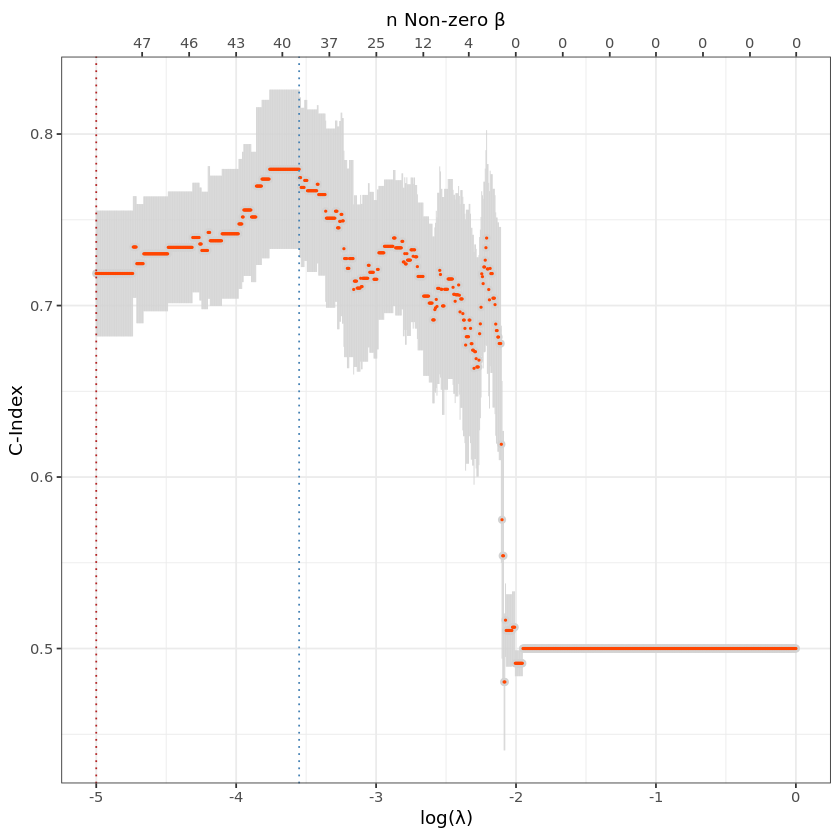

In [8]:
cph_best_lambda <- cph_df %>% filter(best_idx == TRUE) %>% pull(lambda)
cph_kept_lambda <- cph_df %>% filter(kept_idx == TRUE) %>% pull(lambda)
cph_kept_cvm <- cph_df %>% filter(kept_idx == TRUE) %>% pull(cvm)
cph_sec_x_breaks <- every_nth(cph_df$log_lambda, nrow(cph_df) / nbreaks)
cph_sec_x_labs <- every_nth(cph_df$nonzero, nrow(cph_df)/ nbreaks)

glmnet_plot(cph_df, cph_best_lambda, cph_kept_lambda, cph_kept_cvm, cph_sec_x_breaks, cph_sec_x_labs, "C-Index")
ggsave(paste0(dirs$figures_dir, "/models/", unified_dsets[dset_idx], "_cph_fit.png"), last_plot(), height = ht, width = wd, dpi = dpi)

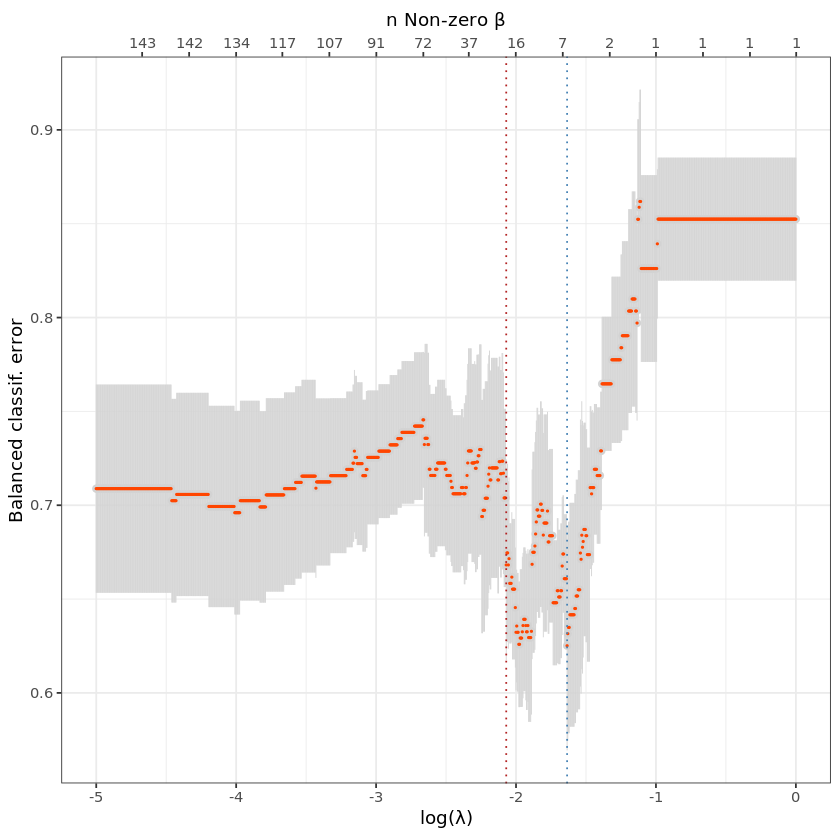

In [9]:
mr_best_lambda <- mr_df %>% filter(best_idx == TRUE) %>% pull(lambda)
mr_kept_lambda <- mr_df %>% filter(kept_idx == TRUE) %>% pull(lambda)
mr_kept_cvm <- mr_df %>% filter(kept_idx == TRUE) %>% pull(cvm)
mr_sec_x_breaks <- every_nth(mr_df$log_lambda, nrow(mr_df) / nbreaks)
mr_sec_x_labs <- every_nth(mr_df$nonzero, nrow(mr_df)/ nbreaks)

glmnet_plot(mr_df, mr_best_lambda, mr_kept_lambda, mr_kept_cvm, mr_sec_x_breaks, mr_sec_x_labs, "Balanced classif. error")
ggsave(paste0(dirs$figures_dir, "/models/", unified_dsets[dset_idx], "_mr_fit.png"), last_plot(), height = ht, width = wd, dpi = dpi)